In [61]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import ElementsEnv
from scipy import signal

%erun Elements 5.12.0

os.environ['ELEMENTS_AUX_PATH'] = '/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/nnpz/auxdir/'

sys.path.append('/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/nnpz/python/')

%load_ext autoreload
%autoreload 2

from nnpz.photometry import DirectoryFilterProvider, FnuuJyPrePostProcessor, PhotometryCalculator, PhotometryWithCorrectionsCalculator
from nnpz.reference_sample.ReferenceSample import ReferenceSample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ref_sample = ReferenceSample('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/ProductionInputEcdmHandler/reference_sample_dir.dir/')

WARN    : Index for provider "pdz" does not follow the physical layout for file 1
2021-10-29T13:53:20CEST nnpz.reference_sample.IndexProvider  WARN : Index for provider "pdz" does not follow the physical layout for file 1
WARN    : Index for provider "sed" does not follow the physical layout for file 1
2021-10-29T13:53:20CEST nnpz.reference_sample.IndexProvider  WARN : Index for provider "sed" does not follow the physical layout for file 1
WARN    : Index for provider "sed" does not follow the physical layout for file 2
2021-10-29T13:53:20CEST nnpz.reference_sample.IndexProvider  WARN : Index for provider "sed" does not follow the physical layout for file 2
WARN    : Index for provider "sed" does not follow the physical layout for file 3
2021-10-29T13:53:20CEST nnpz.reference_sample.IndexProvider  WARN : Index for provider "sed" does not follow the physical layout for file 3
WARN    : Index for provider "sed" does not follow the physical layout for file 4
2021-10-29T13:53:20CEST nnpz.r

In [3]:
filters_provider = DirectoryFilterProvider('/home/aalvarez/Work/Data/SC8/PHZ_Calibration_28jan21/PhosphorosRootEcdmHandler/Phosphoros/AuxiliaryData/Filters/')

In [33]:
filter_map = {}
filter_names = filters_provider.getFilterNames()
for filter_name in filter_names:
    filter_map[filter_name] = filters_provider.getFilterTransmission(filter_name)

In [141]:
sid = np.random.choice(ref_sample.getIds())
sed = ref_sample.getSedData(sid)#9172773410680000)
assert(sed is not None)

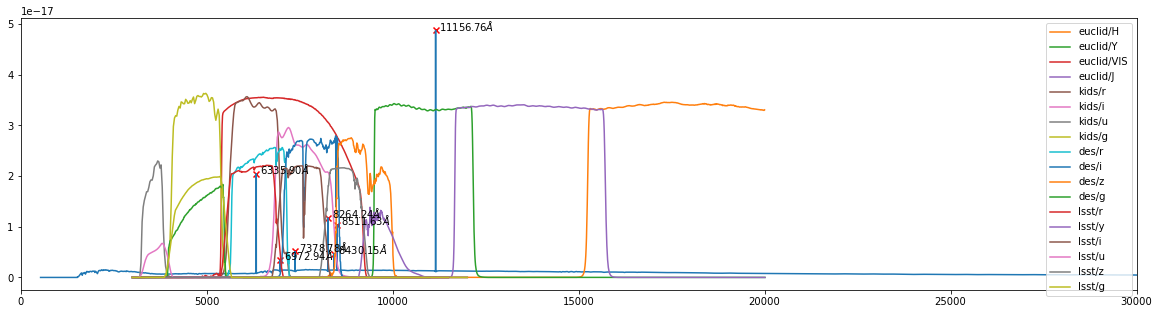

In [143]:
plt.figure(figsize=(20, 5))
plt.plot(sed[:,0], sed[:,1])
msed = sed[:,1].max()
for fname, ftrans in filter_map.items():
    plt.plot(ftrans[:,0], ftrans[:,1]*msed, label=fname)
    
peaks, _ = signal.find_peaks(sed[:, 1], threshold=np.std(sed[:,1]))
plt.scatter(sed[peaks,0], sed[peaks,1], marker='x', color='red')
for p in peaks:
    plt.text(sed[p,0]+100, sed[p,1], f'${sed[p,0]:.2f} \AA$')

plt.xlim(0, 30000)
plt.legend()
plt.savefig('/home/aalvarez/Downloads/peaks.png', bbox_inches='tight')
plt.show()

In [32]:
prepost = FnuuJyPrePostProcessor(filter_map)
shifts = np.concatenate([np.arange(-100, 0), np.arange(1, 101)])
extra_shifts = np.concatenate([np.arange(-200, -100), np.arange(100, 201)])

In [33]:
calculator = PhotometryCalculator(filter_map, prepost, shifts)

In [34]:
corrector = PhotometryWithCorrectionsCalculator(filter_map, prepost, 0.3, shifts)

In [35]:
def plot_interp(raw, photo, axes=None, label=None):
    if axes is None:
        fig, axes = plt.subplots(ncols=3, nrows=len(filter_map)//3, figsize=(20, 20))

    for i, ax in enumerate(axes.ravel()):
        fname = filter_names[i]

        ax.set_title(fname)
        ax.scatter(shifts, raw[fname]/photo[fname][0], marker='.', color='black' if not label else None, label='Raw'if not label else label)
        a, b = corr[filter_names[i]]
        ax.plot(shifts, (a * shifts**2 + b * shifts + 1), color='green' if not label else None, linestyle='-', linewidth=2, label='Fit' if not label else f'Fit {label}')

        if i == 0:
            ax.legend()

# Use filter grid

In [36]:
def filter_grid(trans, sed, _):
    return trans[:, 0]

In [37]:
photo, raw = calculator.compute(sed, filter_grid)
_, _, corr = corrector.compute(sed, filter_grid)

euclid/H (1329,) 10.543494
euclid/H (1329,) 10.543494
euclid/Y (1403,) 10.0
euclid/Y (1403,) 10.0
euclid/VIS (806,) 9.994124
euclid/VIS (806,) 9.994124
euclid/J (1380,) 10.166787
euclid/J (1380,) 10.166787
kids/r (300,) 30.039667
kids/r (300,) 30.039667
kids/i (300,) 30.039667
kids/i (300,) 30.039667
kids/u (300,) 30.039667
kids/u (300,) 30.039667
kids/g (300,) 30.039667
kids/g (300,) 30.039667
des/r (801,) 10.0
des/r (801,) 10.0
des/i (801,) 10.0
des/i (801,) 10.0
des/z (801,) 10.0
des/z (801,) 10.0
des/g (801,) 10.0
des/g (801,) 10.0
lsst/r (8501,) 1.0
lsst/r (8501,) 1.0
lsst/y (8501,) 1.0
lsst/y (8501,) 1.0
lsst/i (8501,) 1.0
lsst/i (8501,) 1.0
lsst/u (8501,) 1.0
lsst/u (8501,) 1.0
lsst/z (8501,) 1.0
lsst/z (8501,) 1.0
lsst/g (8501,) 1.0
lsst/g (8501,) 1.0
euclid/H (1329,) 10.543494
euclid/H (1329,) 10.543494
euclid/Y (1403,) 10.0
euclid/Y (1403,) 10.0
euclid/VIS (806,) 9.994124
euclid/VIS (806,) 9.994124
euclid/J (1380,) 10.166787
euclid/J (1380,) 10.166787
kids/r (300,) 30.039667


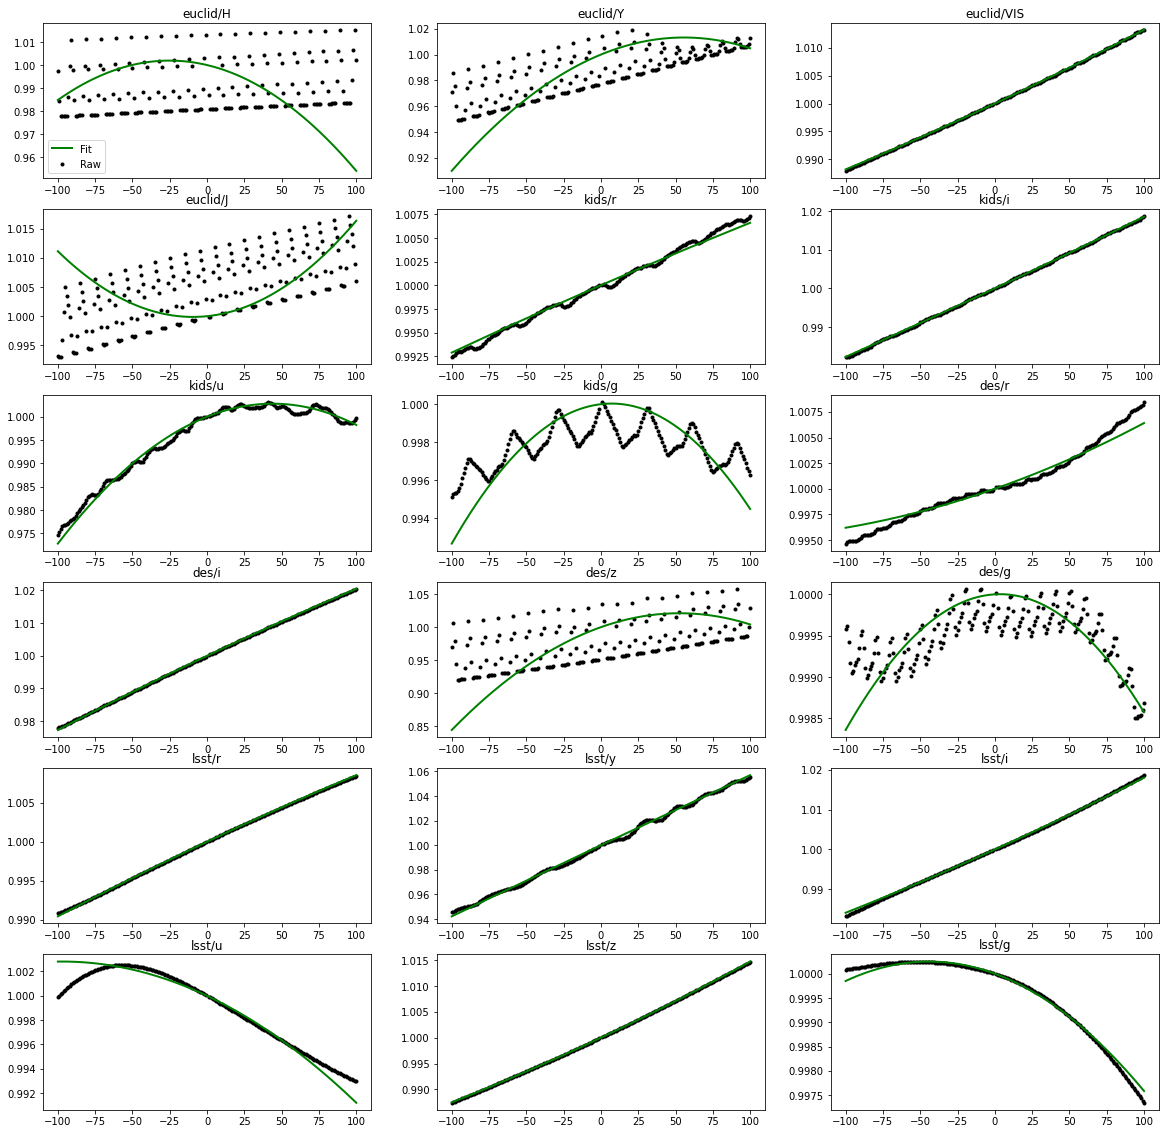

In [38]:
plot_interp(raw, photo)

# Use SED grid

In [39]:
def sed_grid(trans, sed, _):
    return sed[:,0]

In [40]:
photo, raw = calculator.compute(sed, sed_grid)
_, _, corr = corrector.compute(sed, sed_grid)

euclid/H (1781,) 286.5044
euclid/H (1781,) 286.5044
euclid/Y (1781,) 286.5044
euclid/Y (1781,) 286.5044
euclid/VIS (1781,) 286.5044
euclid/VIS (1781,) 286.5044
euclid/J (1781,) 286.5044
euclid/J (1781,) 286.5044
kids/r (1781,) 286.5044
kids/r (1781,) 286.5044
kids/i (1781,) 286.5044
kids/i (1781,) 286.5044
kids/u (1781,) 286.5044
kids/u (1781,) 286.5044
kids/g (1781,) 286.5044
kids/g (1781,) 286.5044
des/r (1781,) 286.5044
des/r (1781,) 286.5044
des/i (1781,) 286.5044
des/i (1781,) 286.5044
des/z (1781,) 286.5044
des/z (1781,) 286.5044
des/g (1781,) 286.5044
des/g (1781,) 286.5044
lsst/r (1781,) 286.5044
lsst/r (1781,) 286.5044
lsst/y (1781,) 286.5044
lsst/y (1781,) 286.5044
lsst/i (1781,) 286.5044
lsst/i (1781,) 286.5044
lsst/u (1781,) 286.5044
lsst/u (1781,) 286.5044
lsst/z (1781,) 286.5044
lsst/z (1781,) 286.5044
lsst/g (1781,) 286.5044
lsst/g (1781,) 286.5044
euclid/H (1781,) 286.5044
euclid/H (1781,) 286.5044
euclid/Y (1781,) 286.5044
euclid/Y (1781,) 286.5044
euclid/VIS (1781,) 2

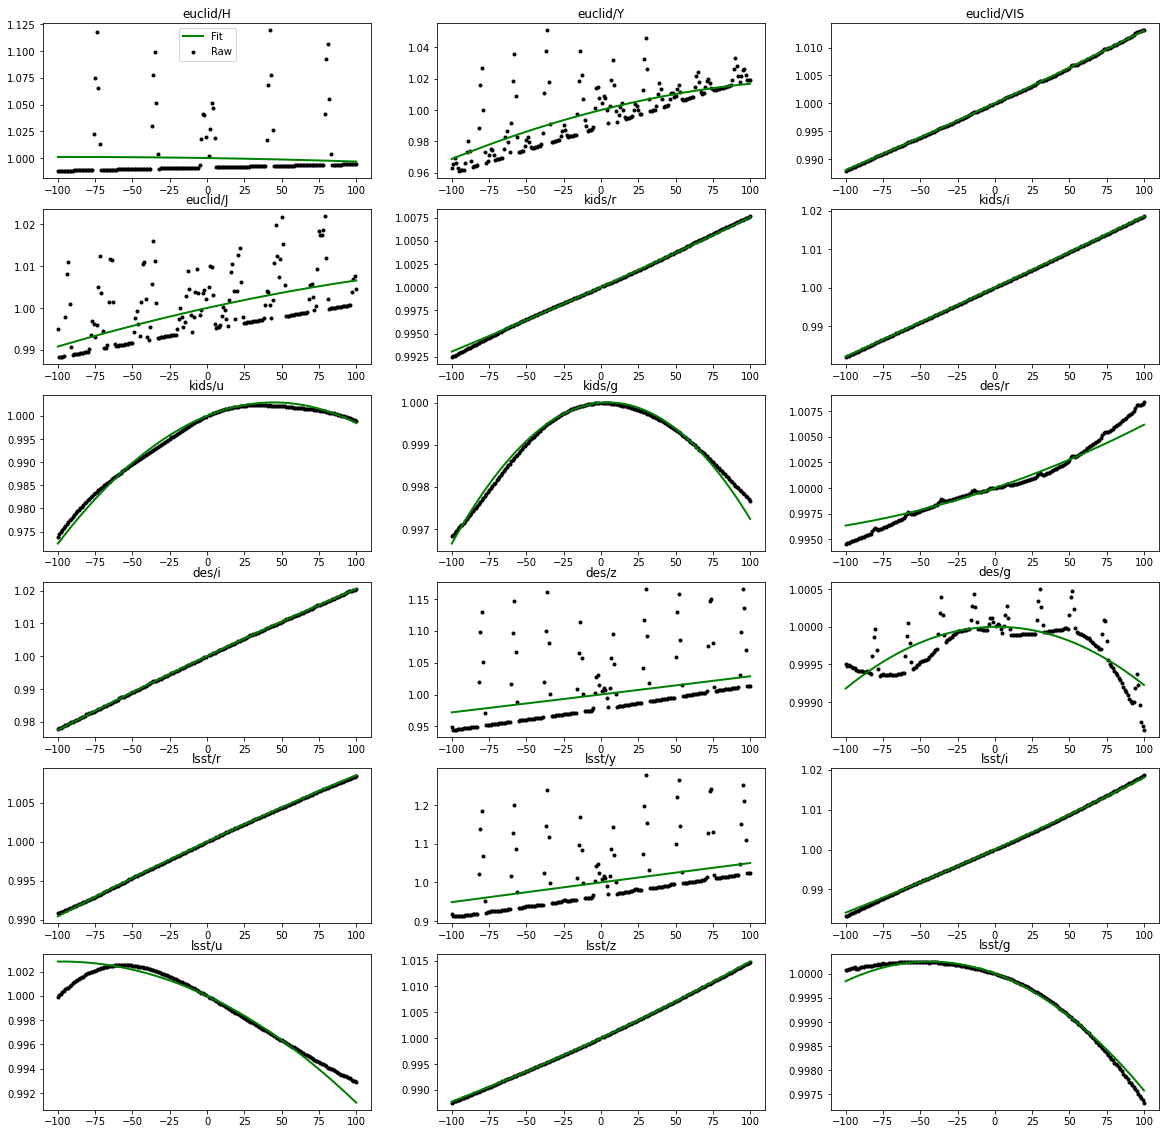

In [41]:
plot_interp(raw, photo)

# Merge both

In [42]:
def comb_grid(trans, sed, _):
    return np.unique(np.concatenate([trans[:,0], sed[:,0]]))

In [43]:
photo, raw = calculator.compute(sed, comb_grid)
_, _, corr = corrector.compute(sed, comb_grid)

euclid/H (3110,) 164.03273
euclid/H (3110,) 164.03273
euclid/Y (3184,) 160.21921
euclid/Y (3184,) 160.21921
euclid/VIS (2587,) 197.20718
euclid/VIS (2587,) 197.20718
euclid/J (3161,) 161.38536
euclid/J (3161,) 161.38536
kids/r (2081,) 245.18161
kids/r (2081,) 245.18161
kids/i (2081,) 245.18161
kids/i (2081,) 245.18161
kids/u (2081,) 245.18161
kids/u (2081,) 245.18161
kids/g (2081,) 245.18161
kids/g (2081,) 245.18161
des/r (2582,) 197.58922
des/r (2582,) 197.58922
des/i (2582,) 197.58922
des/i (2582,) 197.58922
des/z (2582,) 197.58922
des/z (2582,) 197.58922
des/g (2582,) 197.58922
des/g (2582,) 197.58922
lsst/r (10281,) 49.608727
lsst/r (10281,) 49.608727
lsst/y (10281,) 49.608727
lsst/y (10281,) 49.608727
lsst/i (10281,) 49.608727
lsst/i (10281,) 49.608727
lsst/u (10281,) 49.608727
lsst/u (10281,) 49.608727
lsst/z (10281,) 49.608727
lsst/z (10281,) 49.608727
lsst/g (10281,) 49.608727
lsst/g (10281,) 49.608727
euclid/H (3110,) 164.03273
euclid/H (3110,) 164.03273
euclid/Y (3184,) 160.2

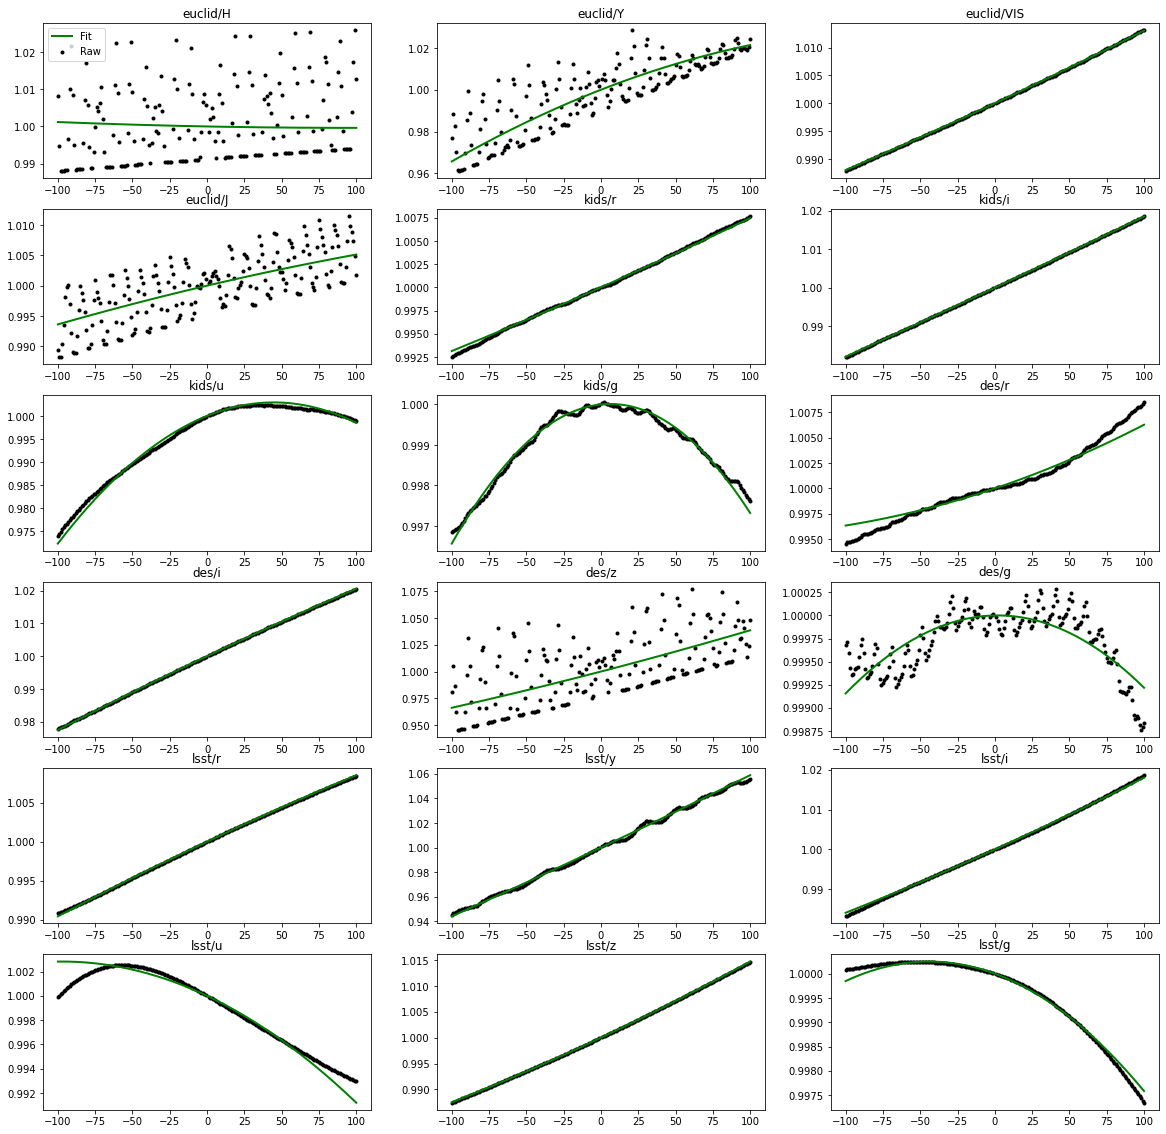

In [44]:
plot_interp(raw, photo)

# Default implementation

In [45]:
photo, raw = calculator.compute(sed, None)
_, _, corr = corrector.compute(sed, None)

euclid/H (1726,) 8.116962182971015
euclid/H (254235,) 0.055860977546767936
euclid/Y (1928,) 7.275557861961598
euclid/Y (122699,) 0.11589430960569855
euclid/VIS (1363,) 5.906953024619126
euclid/VIS (207475,) 0.039741220680814225
euclid/J (1905,) 7.36344537815126
euclid/J (122699,) 0.11589430960569855
kids/r (615,) 9.735683975468241
kids/r (120123,) 0.05142863056673632
kids/i (329,) 11.265032512385671
kids/i (64577,) 0.06031545255299957
kids/u (734,) 9.83555247058322
kids/u (142975,) 0.051823827835393146
kids/g (657,) 9.204146222370428
kids/g (128307,) 0.04861752312343148
des/r (1289,) 5.947204968944099
des/r (111241,) 0.07065803667745416
des/i (1283,) 5.967238689547582
des/i (111231,) 0.07057448530072823
des/z (1236,) 6.194331983805668
des/z (110972,) 0.07073920213389083
des/g (1271,) 5.960629921259843
des/g (109151,) 0.0711864406779661
lsst/r (1811,) 0.9342541436464088
lsst/r (25379,) 0.07451335802663725
lsst/y (2002,) 0.9560219890054973
lsst/y (19714,) 0.10718814995180845
lsst/i (1663

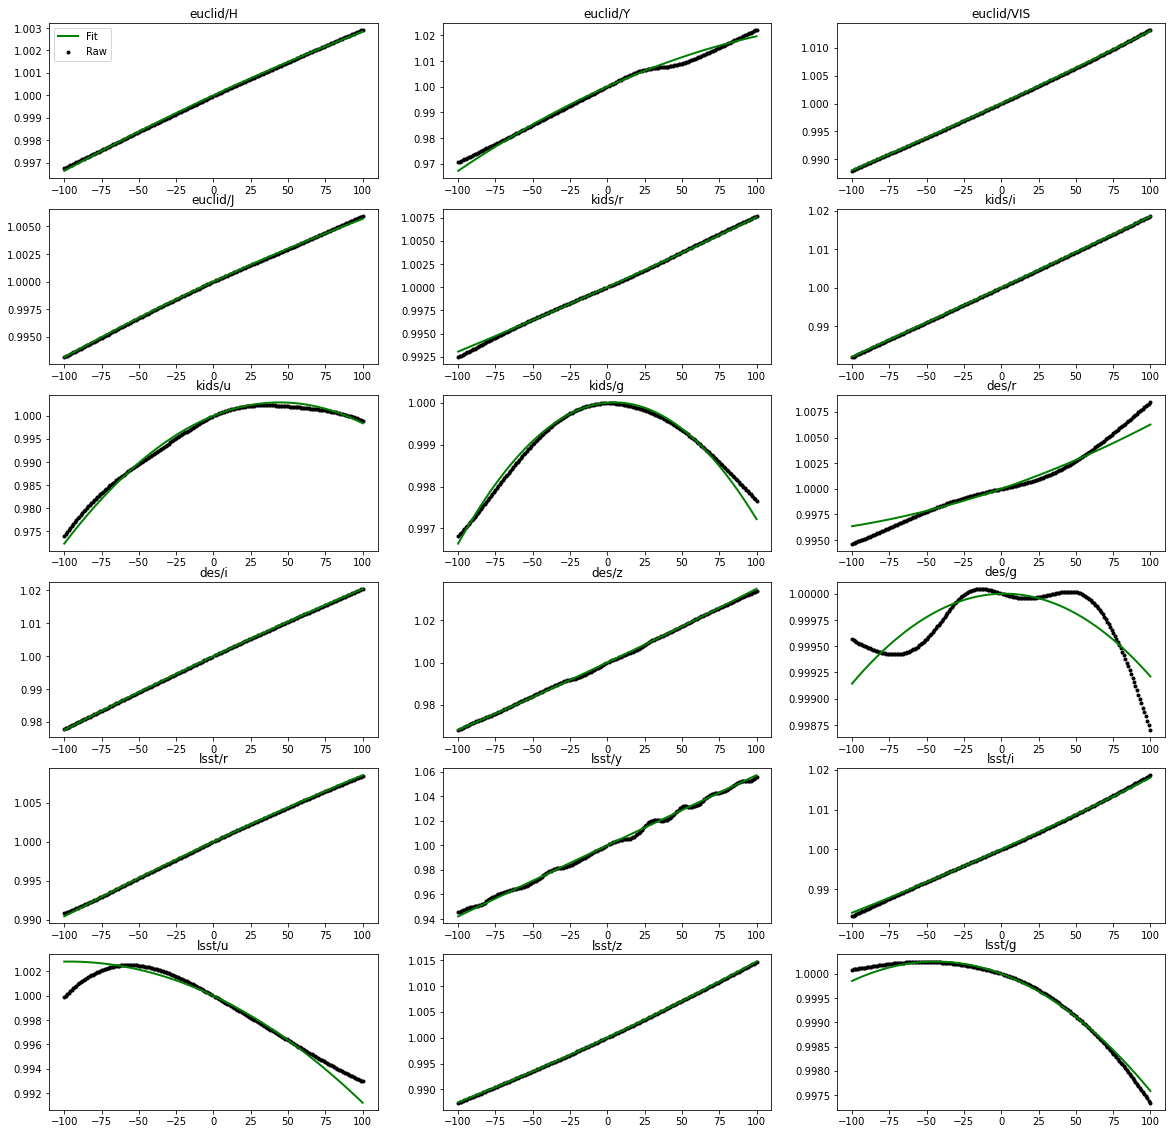

In [46]:
plot_interp(raw, photo)

# Fixed grid ($\Delta\lambda$)

In [47]:
dx = np.diff(sed[:,0]).min()
dx

0.89453125

In [48]:
def fixed_grid(step):
    def fg(trans, sed, _):
        start, end = trans[:,0].min(), trans[:,0].max()
        return np.arange(start, end, step=step)
    return fg

euclid/H (14002,) 1.0
euclid/H (14002,) 1.0
euclid/Y (14020,) 1.0
euclid/Y (14020,) 1.0
euclid/VIS (8046,) 1.0
euclid/VIS (8046,) 1.0
euclid/J (14020,) 1.0
euclid/J (14020,) 1.0
kids/r (8982,) 1.0
kids/r (8982,) 1.0
kids/i (8982,) 1.0
kids/i (8982,) 1.0
kids/u (8982,) 1.0
kids/u (8982,) 1.0
kids/g (8982,) 1.0
kids/g (8982,) 1.0
des/r (8000,) 1.0
des/r (8000,) 1.0
des/i (8000,) 1.0
des/i (8000,) 1.0
des/z (8000,) 1.0
des/z (8000,) 1.0
des/g (8000,) 1.0
des/g (8000,) 1.0
lsst/r (8500,) 1.0
lsst/r (8500,) 1.0
lsst/y (8500,) 1.0
lsst/y (8500,) 1.0
lsst/i (8500,) 1.0
lsst/i (8500,) 1.0
lsst/u (8500,) 1.0
lsst/u (8500,) 1.0
lsst/z (8500,) 1.0
lsst/z (8500,) 1.0
lsst/g (8500,) 1.0
lsst/g (8500,) 1.0
euclid/H (14002,) 1.0
euclid/H (14002,) 1.0
euclid/Y (14020,) 1.0
euclid/Y (14020,) 1.0
euclid/VIS (8046,) 1.0
euclid/VIS (8046,) 1.0
euclid/J (14020,) 1.0
euclid/J (14020,) 1.0
kids/r (8982,) 1.0
kids/r (8982,) 1.0
kids/i (8982,) 1.0
kids/i (8982,) 1.0
kids/u (8982,) 1.0
kids/u (8982,) 1.0
kids/g

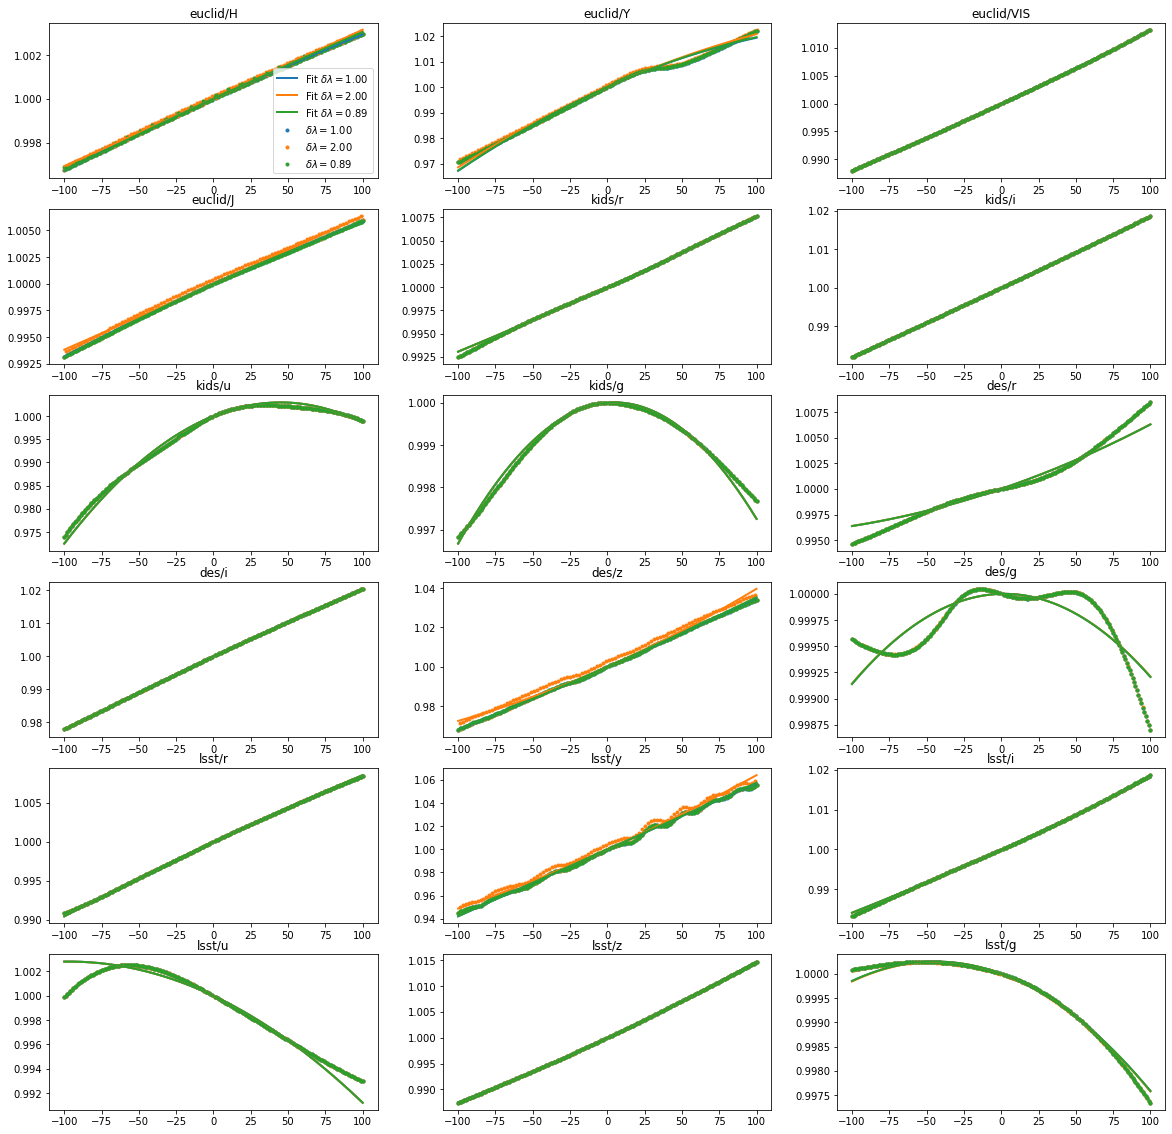

In [49]:
fig, axes = plt.subplots(ncols=3, nrows=len(filter_map)//3, figsize=(20, 20))

for step in [np.abs(shifts).min(), np.abs(shifts).min()*2, dx]:
    photo, raw = calculator.compute(sed, fixed_grid(step))
    _, _, corr = corrector.compute(sed, fixed_grid(step))
    plot_interp(raw, photo, axes=axes, label=f'$\delta\lambda = {step:.2f}$')

# Default